In [45]:
from pytket import Circuit

In [46]:
from qiskit import IBMQ

In [47]:
IBMQ.save_account('2a6c238dccc4a7d3474d9486abe0e429ab4e02fff5def5fd8c17190903e308b7653d923ea8809f75ad5d8308e30dd17da7f3a90572ff9e91562a7728b8467abb')

configrc.store_credentials:WARNING:2021-08-12 23:25:30,799: Credentials already present. Set overwrite=True to overwrite.


In [48]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-08-12 23:25:32,734: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [49]:
from qiskit import *

In [50]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

# My first circuit

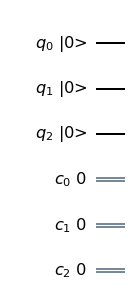

In [51]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.draw(initial_state=True, 
             cregbundle=False, output = 'mpl') 

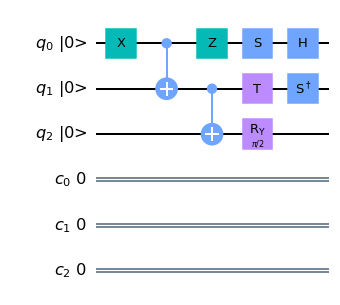

In [52]:
circuit.x(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.z(qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.s(qreg_q[0])
circuit.t(qreg_q[1])
circuit.ry(pi/2, qreg_q[2])
circuit.h(qreg_q[0])
circuit.sdg(qreg_q[1])

circuit.draw(initial_state=True, 
             cregbundle=False, output = 'mpl') 


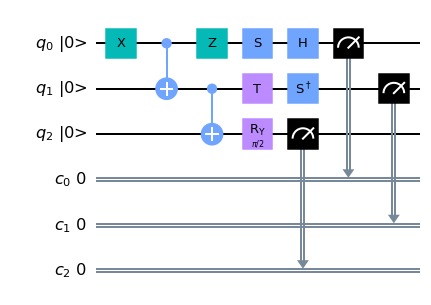

In [53]:
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2]) 


circuit.draw(initial_state=True, 
             cregbundle=False, output = 'mpl') 


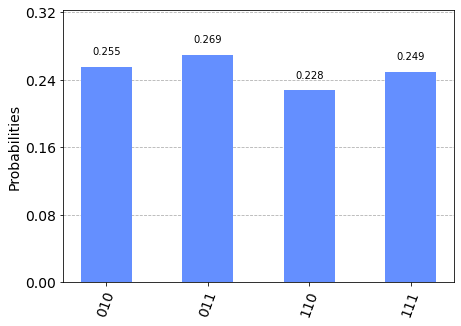

In [56]:
from qiskit.tools.visualization import plot_histogram


simulator = provider.get_backend('ibmq_qasm_simulator')
job = execute(circuit, simulator)
result = job.result()
#result = execute(circuit, backend = simulator).result()
plot_histogram(result.get_counts(circuit))

Job Status: job has successfully run


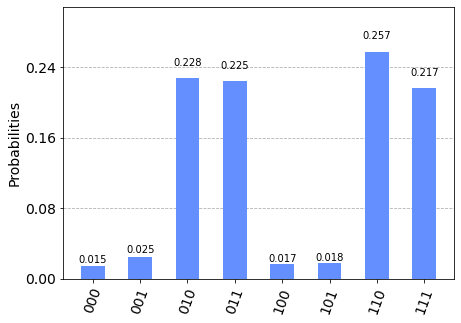

In [58]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_belem')
job = execute(circuit, backend = qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result2 = job.result()
plot_histogram(result2.get_counts(circuit))

In [24]:
from pytket import Circuit
import math

circ = Circuit(3,3)

circ.X(0)
circ.CX(0,1)
circ.CX(1,2)

circ.Z(0)
circ.S(0)
circ.H(0)


circ.T(1)
circ.Sdg(1)

circ.Ry(1.57, 2)

circ.Measure(0, 0)
circ.Measure(1,1)
circ.Measure(2,2)
#circ.Rz(0.3, 1)
#circ.CX(0, 1)


[X q[0]; CX q[0], q[1]; Z q[0]; CX q[1], q[2]; S q[0]; T q[1]; Ry(1.57) q[2]; Measure q[2] --> c[2]; H q[0]; Sdg q[1]; Measure q[0] --> c[0]; Measure q[1] --> c[1]; ]

In [25]:
from pytket.circuit.display import render_circuit_jupyter
render_circuit_jupyter(circ)